# Unsupervised Learning Team JS4
We will use this Notebook to build and test various models relating to our goal.

## Our Team:
- Thembinkosi Malefo
- Nomfundo Manyisa
- Kwanda Silekwa
- Sihle Riti
- Ofentse Sabe
- Thanyi

## Introduction
The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

### What is recommendation system?
Recommender System is a system that seeks to predict or filter preferences according to the user’s choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.

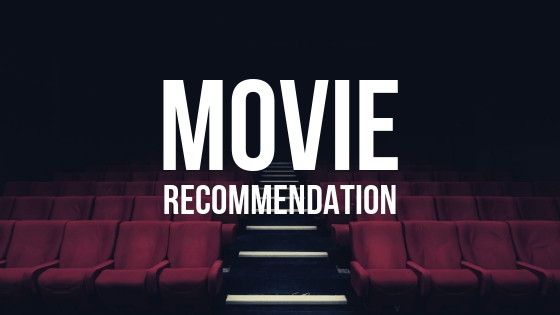



The current recommendation systems that are bring used and are popular are the content-based filtering and collaborative filtering which works by implementing different information sources to make the recommendations.

- Content-based filtering (CBF) : makes recommendations based on user preferences for product features.
- Collaborative filtering (CF): mimics user-to-user recommendations (i.e. it relies on how other users have responded to the same items). 

It predicts users preferences as a linear, weighted combination of other user preferences.
We have to note that both of these methods have limitations: The CBF can recommend a new item but needs more data on user preferences to give out the best match. On the other hand, the CF requires large dataset with active users who rated the product before to make the most accurate predictions. The combination of both of these methods is known as hybrid recommendation systems.

## Problem statement:
Construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences

## Importing Libraries

In [1]:
# data analysis libraries
import pandas as pd
import numpy as np

# Kaggle requirements
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns
from numpy.random import RandomState

#word cloud
%matplotlib inline
import wordcloud

from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
sns.set()

# visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-challenge/movies.csv
/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-challenge/train.csv
/kaggle/input/edsa-movie-recommendation-challenge/test.csv
/kaggle/input/edsa-movie-recommendation-challenge/tags.csv
/kaggle/input/edsa-movie-recommendation-challenge/links.csv


## Loading the dataset
We going to load the dataframe will be working with

In [2]:
#Loading data
train = pd.read_csv('../input/edsa-movie-recommendation-challenge/train.csv')
test_df = pd.read_csv('../input/edsa-movie-recommendation-challenge/test.csv')
df_movies = pd.read_csv('../input/edsa-movie-recommendation-challenge/movies.csv')
df_samp = pd.read_csv('../input/edsa-movie-recommendation-challenge/sample_submission.csv')
df_imdb = pd.read_csv('../input/edsa-movie-recommendation-challenge/imdb_data.csv')
df_gtags = pd.read_csv("../input/edsa-movie-recommendation-challenge/genome_tags.csv")
df_scores = pd.read_csv("../input/edsa-movie-recommendation-challenge/genome_scores.csv")
df_tags = pd.read_csv("../input/edsa-movie-recommendation-challenge/tags.csv")
df_links = pd.read_csv("../input/edsa-movie-recommendation-challenge/links.csv")

## Evaluating the data

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

### Source
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

### Supplied files
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [1]:
print("Train data contains {} rows and {} columns".format(train.shape[0], train.shape[1]))
print("Movie data contains {} rows and {} columns".format(df_movies.shape[0], df_movies.shape[1]))
print("Imdb data contains {} rows and {} columns".format(df_imdb.shape[0], df_imdb.shape[1]))
print("Genome_tags data contains {} rows and {} columns".format(df_gtags.shape[0], df_gtags.shape[1]))
print("Genome_scores data contains {} rows and {} columns".format(df_scores.shape[0], df_scores.shape[1]))
print("Tags data contains {} rows and {} columns".format(df_tags.shape[0], df_tags.shape[1]))
print("Links data contains {} rows and {} columns".format(df_links.shape[0], df_links.shape[1]))

NameError: name 'train' is not defined

In [4]:
#viewing training data
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


Train:

- UserId
- movieId : Identifier for movies used
- rating : Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars)
- timestamp: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [5]:
#viewing tags data
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


Tags:

- userId
- movieId : Identifier for movies used
- tag : User-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.
- timestamp : represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [6]:
#viewing movies data
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Movies:

- movieId : Identify the movies that are watched 

- title : Entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

- genres: They are pipe-separated list, and are selected from the following:
    - Action
    - Adventure
    - Animation
    - Children's
    - Comedy
    - Crime
    - Documentary
    - Drama
    - Fantasy
    - Film-Noir
    - Horror
    - Musical
    - Mystery
    - Romance
    - Sci-Fi
    - Thriller
    - War
    - Western
    - (no genres listed)

In [7]:
#viewing links data
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Links:

- movieId : Identifier for movies used by https://movielens.org
- imdbId : Identifier for movies used by http://www.imdb.com
- tmdbId : An identifier for movies used by https://www.themoviedb.org.

In [8]:
#viewing genome scores data
df_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [9]:
#viewing genome tags data
df_gtags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


Genome_tags:

- tagId
- tag : tag descriptions for the tag IDs in the genome file

In [10]:
#viewing Imdb_data
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [11]:
df_imdb.describe(include = 'all')

,movieId,title_cast,director,runtime,budget,plot_keywords
count,27278.000000,17210,17404,15189.000000,7906,16200
unique,NaN,17143,11786,NaN,1362,16008
top,NaN,Louis C.K.,See full summary,NaN,"$10,000,000",Documentary
freq,NaN,5,28,NaN,232,19
mean,59855.480570,NaN,NaN,100.312331,NaN,NaN
std,44429.314697,NaN,NaN,31.061707,NaN,NaN
min,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,6931.250000,NaN,NaN,89.000000,NaN,NaN
50%,68068.000000,NaN,NaN,98.000000,NaN,NaN
75%,100293.250000,NaN,NaN,109.000000,NaN,NaN


## Data Preparation
Inorder to play along with our data and before data processing. Let's merge some of our data to see how it work out.

### Merging of the dataset

In [12]:
# Merge the train and movies data
df_table1 = train.merge(df_movies, on='movieId')

# Viewing the 1st 5 rows
df_table1.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [13]:
# Checking for nulls
df_table1.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [14]:
# Merging table1 dataframe and Imdb data
df_table2 = df_table1.merge(df_imdb, on='movieId')

# Viewing the 1st 5 rows
df_table2.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [15]:
# Checking for nulls
df_table2.isnull().sum()

userId                 0
movieId                0
rating                 0
timestamp              0
title                  0
genres                 0
title_cast       2604407
director         2602688
runtime          2653058
budget           3152276
plot_keywords    2610043
dtype: int64

In [16]:
df_table2.shape

(9633031, 11)

In [17]:
df_table2.dtypes

userId             int64
movieId            int64
rating           float64
timestamp          int64
title             object
genres            object
title_cast        object
director          object
runtime          float64
budget            object
plot_keywords     object
dtype: object

## Exploratory data analysis

### Cleaning of the data and Visualizing

### Lets start by visualizing the rating
Since we want to check the number of ratings people did, let add a column named, 'Number of rating'

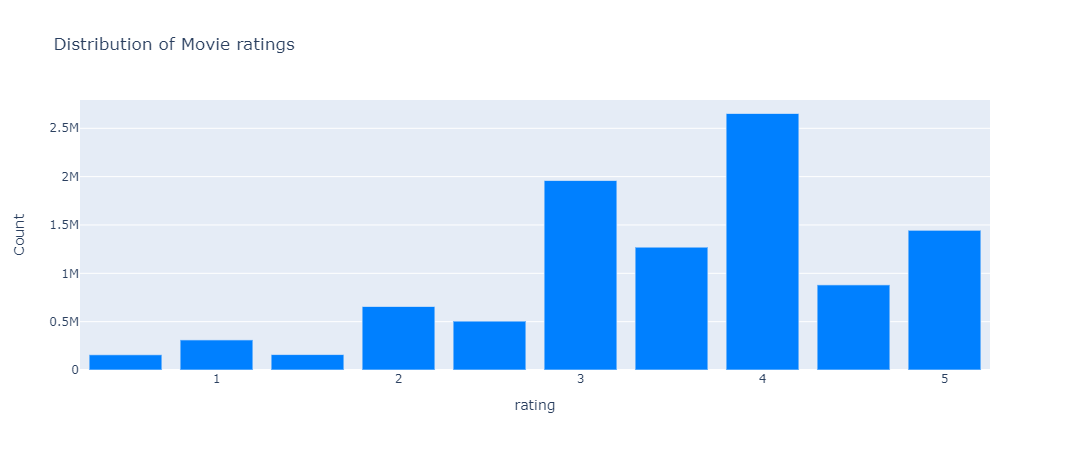

In [18]:
# Creating a plot for the movie ratings
data = df_table1['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x=data.index,
               y=data.values,
               marker=dict(color='#0080ff'))
layout = dict(title='Distribution of Movie ratings'.format(df_table1.shape[0]),
              xaxis=dict(title='rating'),
              yaxis=dict(title='Count'))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


- We can observe that most of the movies we rated above 3 which exceeded the average of ratings and least of the movie rating was below 3

## Let's see how the genres are

In [19]:
df_table2.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


## Some preprocessing on the genre column will do

In [20]:
genres_list = []
for genre in df_table1.genres.unique():
    genres_list = genres_list + genre.split("|")
    genres_list = list(set(genres_list))
    
print(genres_list)

['Romance', 'Fantasy', 'Children', 'Mystery', 'Sci-Fi', 'Animation', 'Crime', 'Drama', 'IMAX', 'Film-Noir', 'Documentary', '(no genres listed)', 'Horror', 'Thriller', 'War', 'Adventure', 'Comedy', 'Western', 'Musical', 'Action']


In [21]:
# Make a census of the genre keywords
genre_labels = set()
for s in df_movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
   
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
                
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count
keyword_occurences, dum = count_word(df_movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348]]

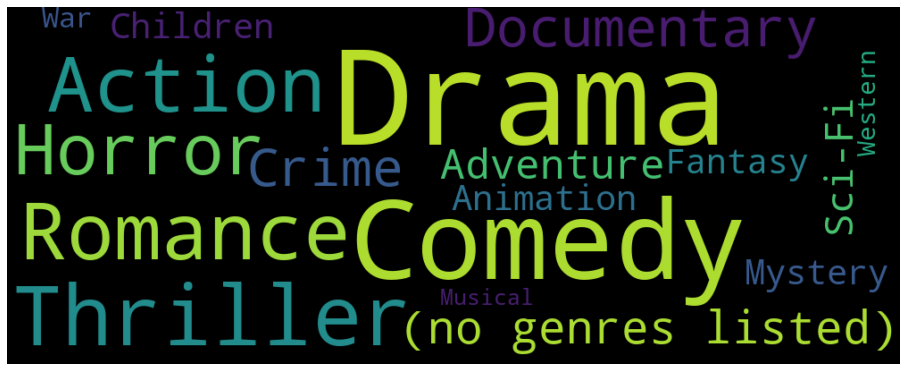

In [22]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# plot the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='black')
genre_wordcloud.generate_from_frequencies(genres)
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
df_table2.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [24]:
# Remove pipes between the genres
df_table2['genres'] = df_table2['genres'].map(lambda x: x.lower().split('|'))
df_table2['genres'] = df_table2['genres'].apply(lambda x: " ".join(x))
df_table2.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [25]:
# Some preprocessing will done on the budget column
#Removing commas
df_table2['budget'] = df_table2['budget'].str.replace(',', '')

#remove currency signs
df_table2['budget'] = df_table2['budget'].str.extract('(\d+)', expand=False)

# Replace Nan with 0 on budget
df_table2['budget'] = df_table2['budget'].replace(np.nan, 0)

In [26]:
# Removing the years from title
df_table2['release_year'] = df_table2.title.str.extract('(\(\d\d\d\d\))', expand=False)

In [27]:
# Changing the timestamp into years
import time
df_table2['timestamp'] = df_table2['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
df_table2.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,release_year
0,5163,57669,4.0,2018,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008)
1,87388,57669,3.5,2009,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008)
2,137050,57669,4.0,2015,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008)
3,120490,57669,4.5,2014,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008)
4,50616,57669,4.5,2015,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008)


### Let's start by visualzing the movies

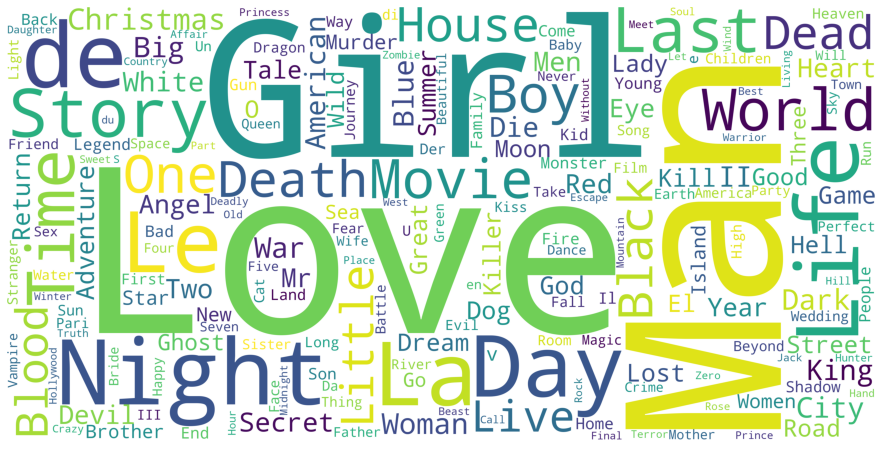

In [28]:
# Create a wordcloud of the movie titles
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

- We can observe from that Girl, Love and Man are the most popular title words
- We also observed that warrior, affair and without are the least popular title words

In [29]:
# Creating a dataframe for the number of movies
num_ratings = pd.DataFrame(df_table2.groupby('movieId').count()['rating']).reset_index()
df_table2 = pd.merge(left=df_table2, right=num_ratings, on='movieId')
df_table2.rename(columns={'rating_x': 'rating', 'rating_y': 'NumberRatings'}, inplace=True)
df_table2.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,release_year,NumberRatings
0,5163,57669,4.0,2018,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008),4253
1,87388,57669,3.5,2009,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008),4253
2,137050,57669,4.0,2015,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008),4253
3,120490,57669,4.5,2014,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008),4253
4,50616,57669,4.5,2015,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008),4253


In [30]:
# Dropping the duplicates in the movies
Remove_duplicates= df_table2.drop_duplicates('movieId')
Remove_duplicates.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,release_year,NumberRatings
0,5163,57669,4.0,2018,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008),4253
4253,106343,5,4.5,2008,Father of the Bride Part II (1995),comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,30000000,fatherhood|doberman|dog|mansion,(1995),4648
8901,146790,5459,5.0,2004,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,action comedy sci-fi,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,88.0,140000000,lingerie|michael jackson character|shorthaired...,(2002),5730
14631,106362,32296,2.0,2015,Miss Congeniality 2: Armed and Fabulous (2005),adventure comedy crime,Sandra Bullock|Regina King|Enrique Murciano|Wi...,Marc Lawrence,115.0,45000000,female protagonist|cleave gag|good woman|fbi,(2005),658
15289,9041,366,3.0,1996,Wes Craven's New Nightmare (Nightmare on Elm S...,drama horror mystery thriller,Jeff Davis|Heather Langenkamp|Miko Hughes|Matt...,Wes Craven,112.0,8000000,freddy krueger|elm street|famous director as h...,(1994),1077


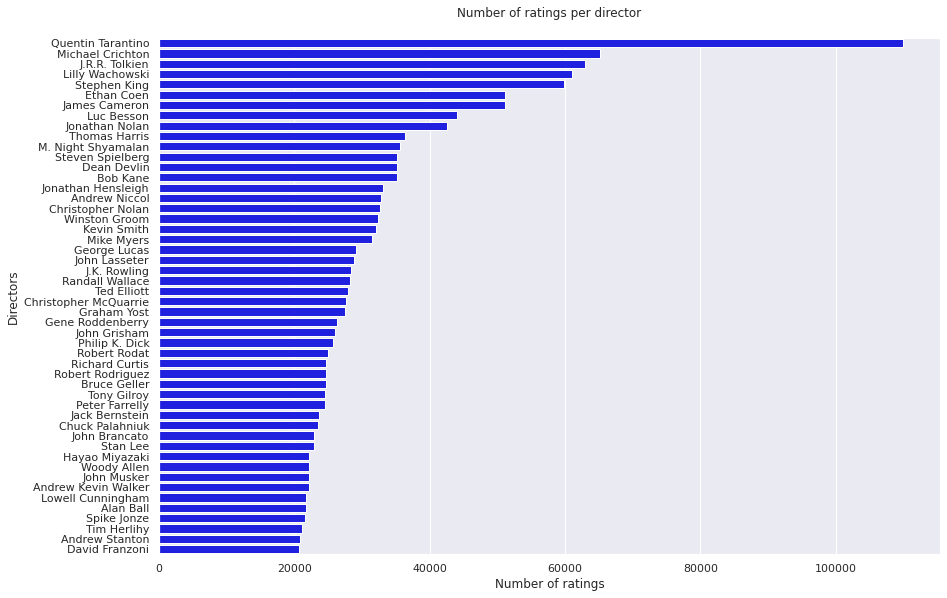

In [31]:
# Getting the number of ratings per director
Director_ratings = pd.DataFrame(Remove_duplicates.groupby('director').sum()['NumberRatings'].sort_values(ascending=False)).reset_index()

# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = Director_ratings.head(50), y = 'director', x = 'NumberRatings', color = 'Blue')
plt.ylabel('Directors')
plt.xlabel('Number of ratings')
plt.title('Number of ratings per director\n')
#plt.xlim(0, 27)
plt.show()

In [32]:
# Number of movies per director
director_movies = pd.DataFrame(Remove_duplicates.groupby('director').count()['title'].sort_values(ascending=False)).reset_index()
director_movies.head()

,director,title
0,Luc Besson,26
1,See full summary,25
2,Woody Allen,25
3,Stephen King,23
4,William Shakespeare,18


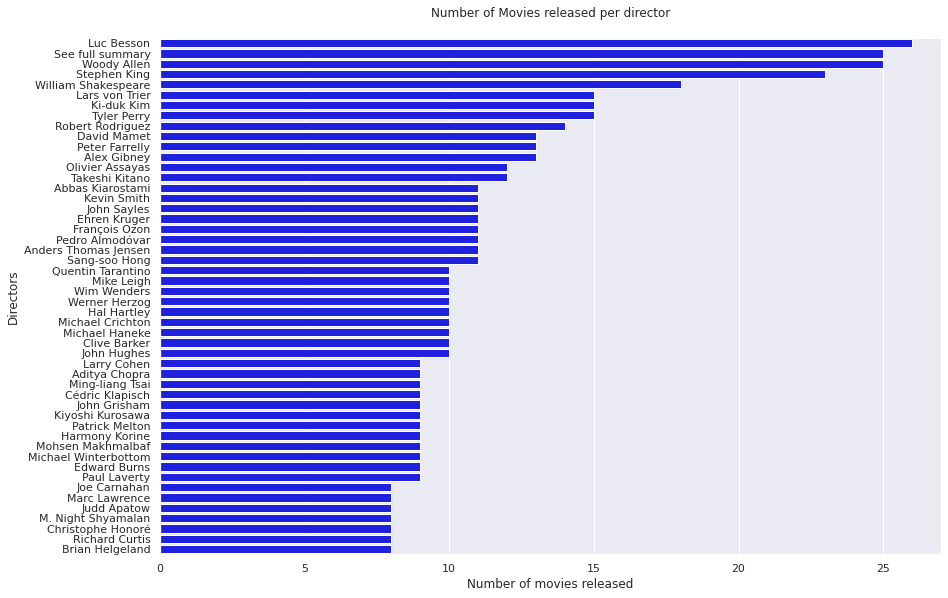

In [33]:
# Number of movies per director
director_movies = pd.DataFrame(Remove_duplicates.groupby('director').count()['title'].sort_values(ascending=False)).reset_index()


# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = director_movies.head(50), y = 'director', x = 'title', color = 'Blue')
plt.ylabel('Directors')
plt.xlabel('Number of movies released')
plt.title('Number of Movies released per director\n')
plt.xlim(0, 27)
plt.show()

### Movies by genre

## We will first intsall and download some packages
Here will install all the packages will need like comet 

## Step 1: Bringing in the dataset

## Step 2: Visualise and clean data

## Step 3: Build and evaluate models

## Step 4: Conclusion

## Step 5: Generate Submissions